Implementation of Binary Logistic Regression Model in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [4]:
X, y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


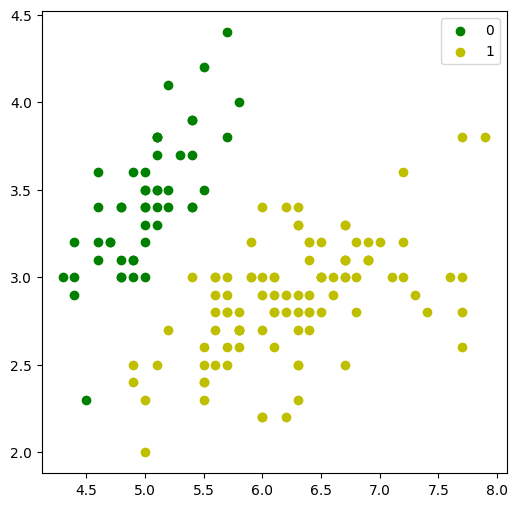

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()

In [6]:
class LogisticRegression:
	"""
	Simple binary logistic regression using batch gradient descent.
	If X and y are not provided to the constructor, it will try to fit using
	global variables X and y from the notebook (convenient in a Jupyter flow).
	"""
	def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False, X=None, y=None):
		self.lr = lr
		self.num_iter = num_iter
		self.fit_intercept = fit_intercept
		self.verbose = verbose
		self.theta = None
		# Auto-fit if training data is available either as args or globals
		if X is not None and y is not None:
			self.fit(X, y)
		else:
			if 'X' in globals() and 'y' in globals():
				self.fit(globals()['X'], globals()['y'])

	def _add_intercept(self, X):
		if not self.fit_intercept:
			return X
		return np.hstack([np.ones((X.shape[0], 1)), X])

	def _sigmoid(self, z):
		return 1.0 / (1.0 + np.exp(-z))

	def fit(self, X, y):
		Xb = self._add_intercept(X)
		self.theta = np.zeros(Xb.shape[1])
		for i in range(self.num_iter):
			z = Xb.dot(self.theta)
			h = self._sigmoid(z)
			grad = Xb.T.dot(h - y) / y.size
			self.theta -= self.lr * grad
			if self.verbose and (i % max(1, self.num_iter // 10) == 0):
				loss = - (y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15)).mean()
				print(f'iter={i}, loss={loss}')
		return self

	def predict_prob(self, X):
		Xb = self._add_intercept(X)
		return self._sigmoid(Xb.dot(self.theta))

	def predict(self, X, threshold=0.5):
		return (self.predict_prob(X) >= threshold).astype(int)

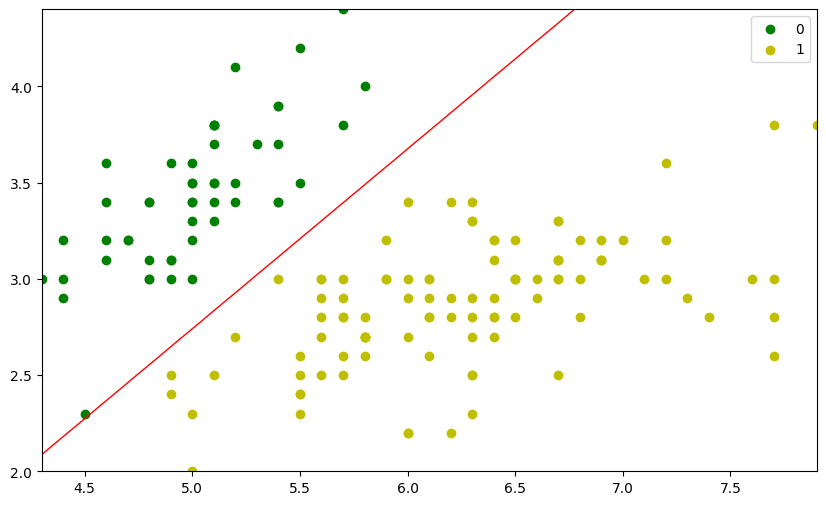

In [7]:
model = LogisticRegression(lr=0.1, num_iter=300000)
preds = model.predict(X)
(preds == y).mean()

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');